1. Ислледуемый датасет.

Пищевая ценность продуктов (Food Nutritional Facts).

https://www.kaggle.com/datasets/beridzeg45/food-nutritional-facts

2. Краткое описание.

Предметная область - продукты питания (фрукты, овощи, мясо, рыба, орехи и др.).
Источник данных - научные интернет-ресурсы по питанию, медицине и здоровью.
Характер данных - реальные данные.

В датасете представлены строковые (название продукта и категория) и числовые (количество вещества в продукте) данные.

Задача анализа - изучить уровень содержания микроэлементов в продуктах, а также выяснить, какие продукты более предпочтительны для добавления в свой рацион питания.

Подключим библиотеки:
* pandas - для обработки и анализа данных;
* matplotlib - для визуализации данных двухмерной графикой.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'foodstruct_nutritional_facts.csv'
data = pd.read_csv(file_path)

print(data.head())

     Food Name Category Name  Calcium  Calories  Carbs  Cholesterol   Copper  \
0      Acerola        Fruits    0.012      32.0    7.7          0.0  0.00009   
1        Apple        Fruits    0.006      52.0   14.0          0.0  0.00003   
2      Apricot        Fruits    0.013      48.0   11.0          0.0  0.00008   
3  Dried fruit        Fruits    0.055     241.0   63.0          0.0  0.00034   
4      Avocado        Fruits    0.012     160.0    8.5          0.0  0.00019   

    Fats  Fiber    Folate  ...  Vitamin D  Vitamin E  Vitamin K  \
0   0.30    1.1  0.000014  ...        NaN        NaN        NaN   
1   0.17    2.4  0.000003  ...        0.0    0.00018   0.000002   
2   0.39    2.0  0.000009  ...        0.0    0.00089   0.000003   
3   0.51    7.3  0.000010  ...        0.0    0.00430   0.000003   
4  15.00    6.7  0.000081  ...        0.0    0.00210   0.000021   

   Omega-3 - ALA  Omega-6 - Eicosadienoic acid  Omega-6 - Gamma-linoleic acid  \
0            NaN                   

3. Анализ атрибутов.

Пропущенных значений нет. Если бы были, правильно было бы обозначить их за 0 (0г/100г).
Выбросы есть. Выбросами являются продукты с резко высоким содержанием микронутриентов.

Гистограмма распределения выбросов, среднее значение, СКО:

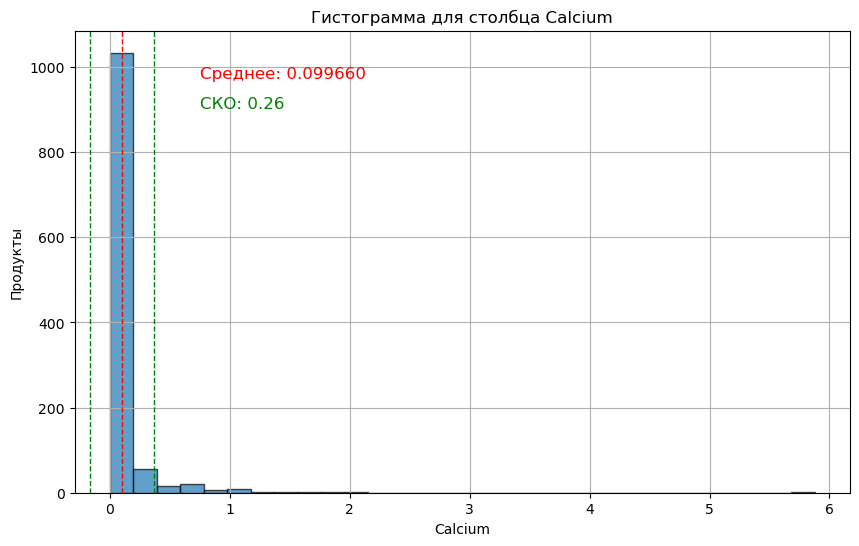

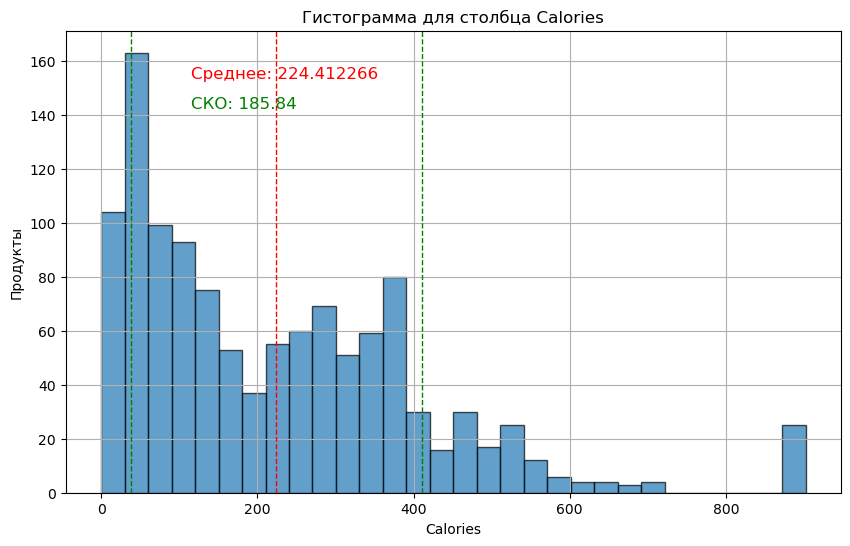

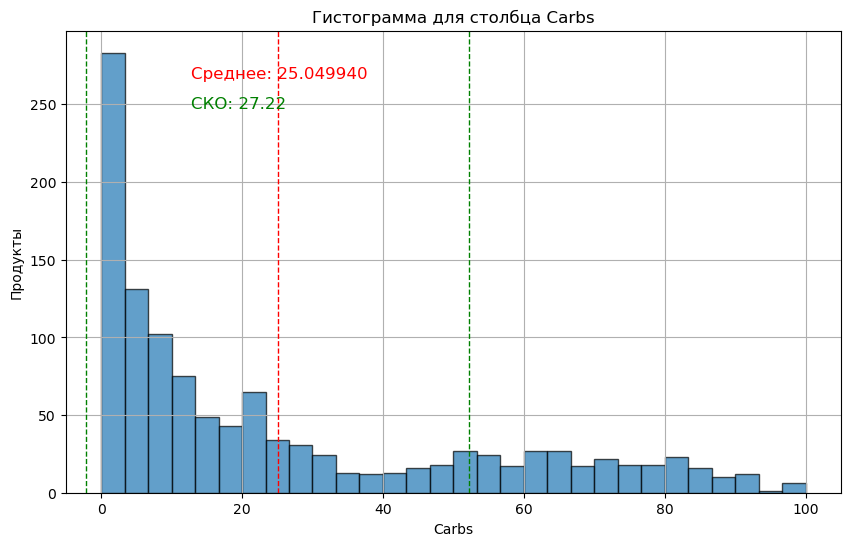

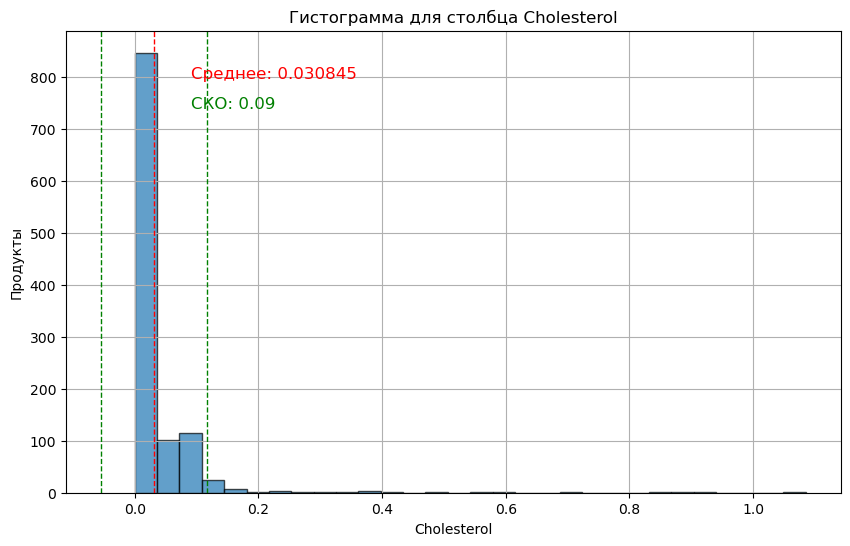

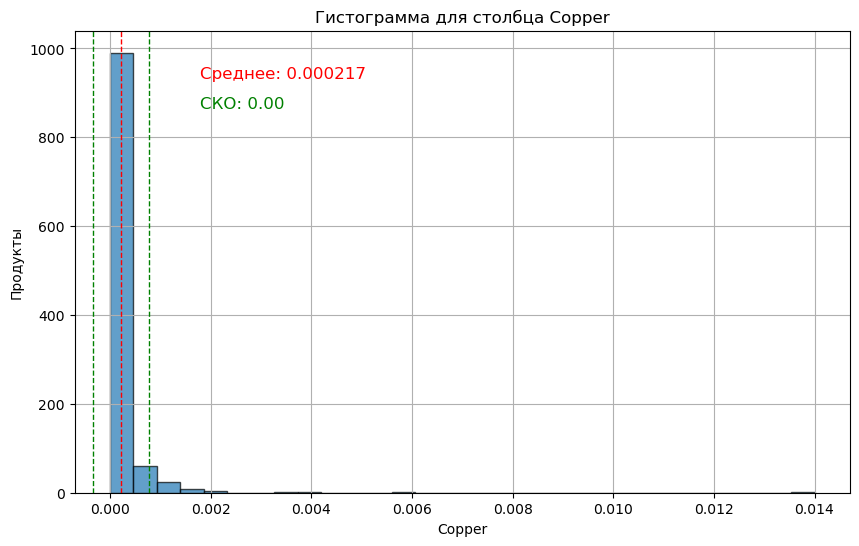

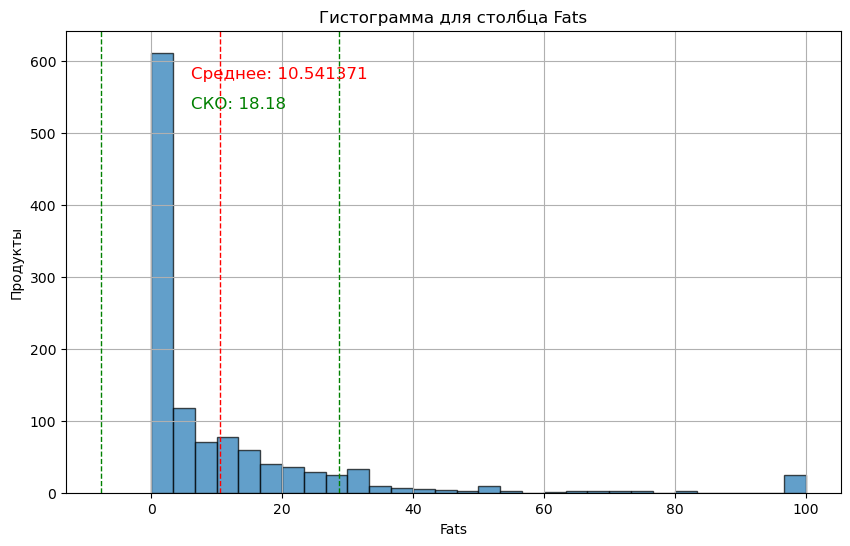

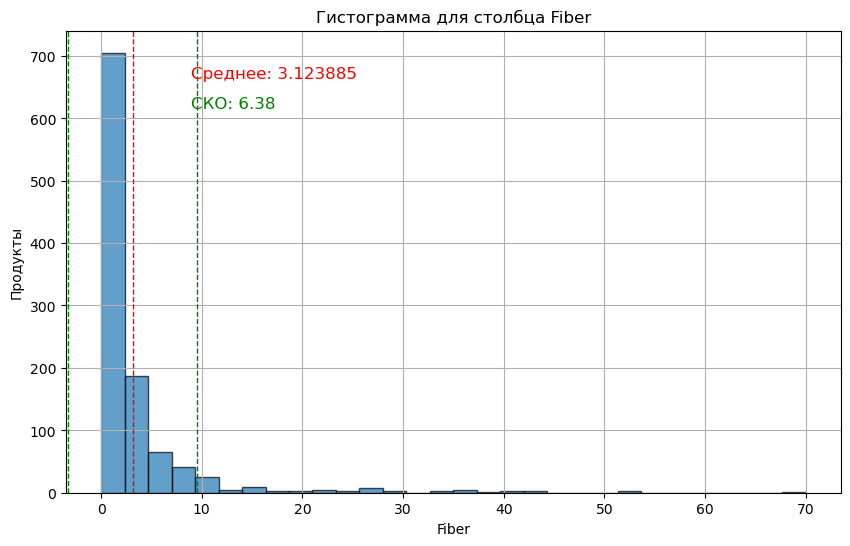

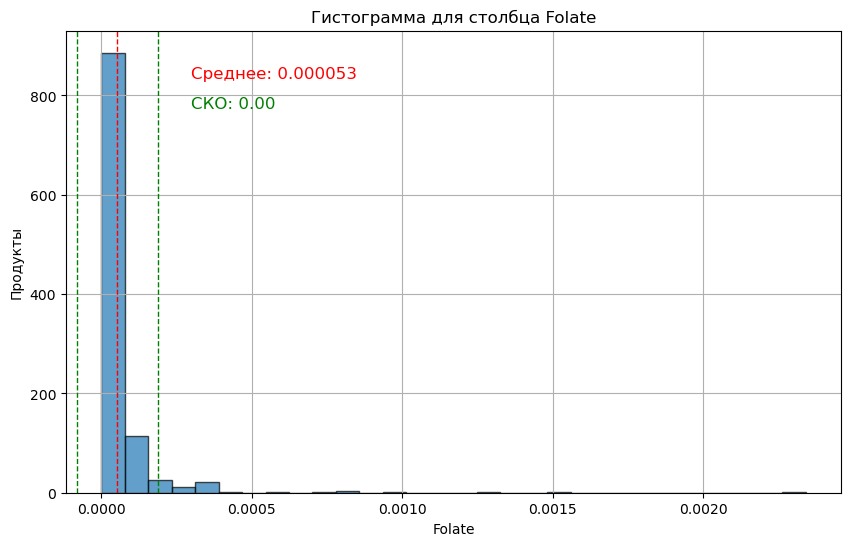

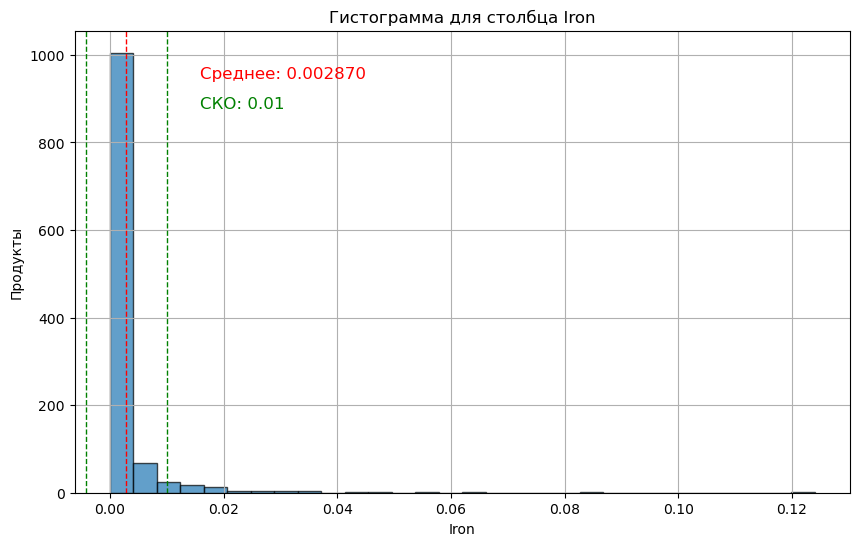

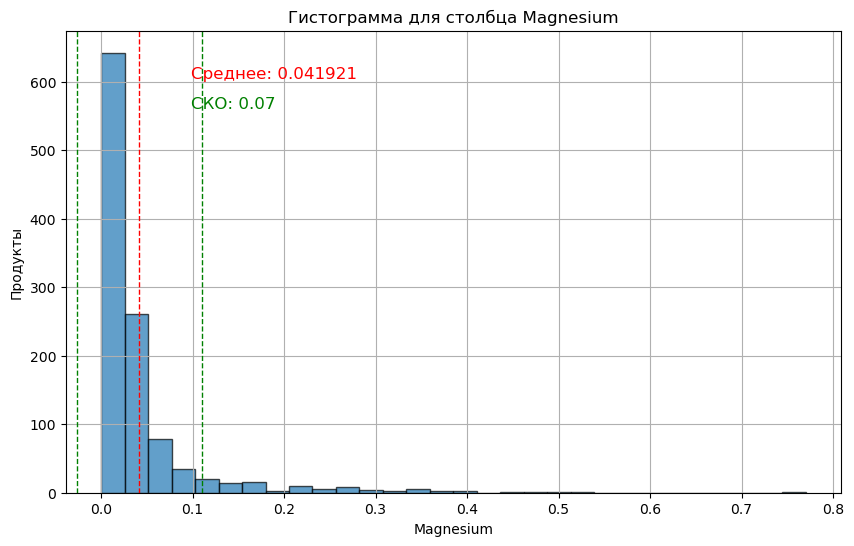

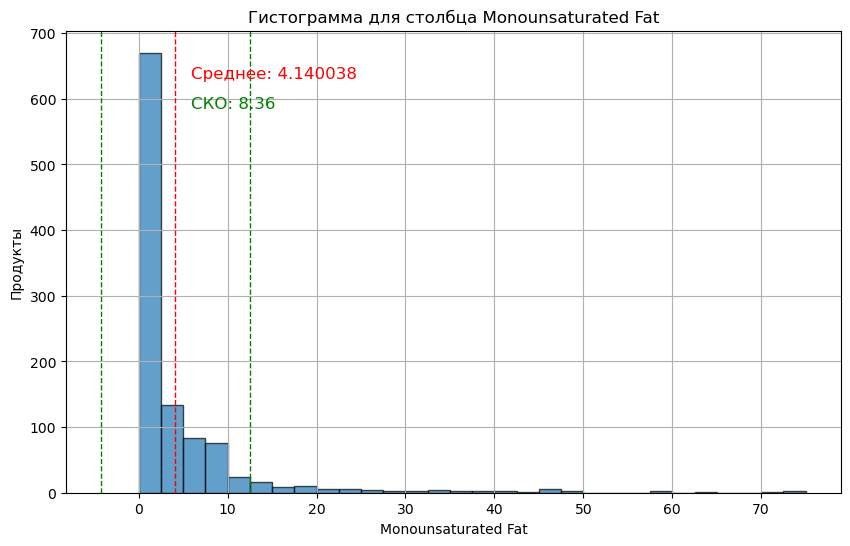

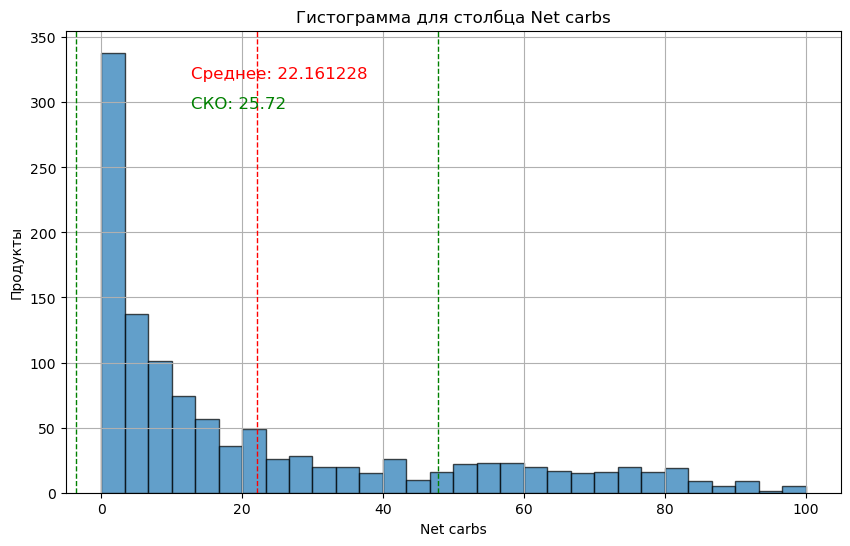

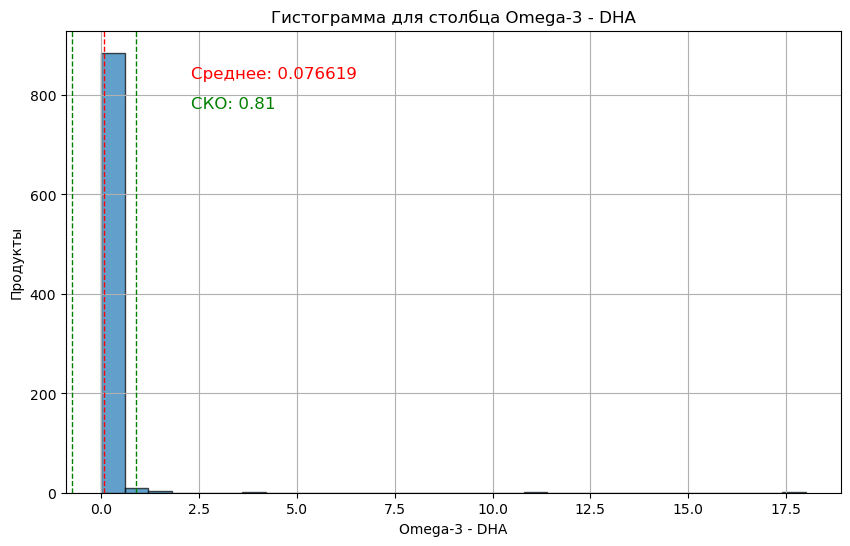

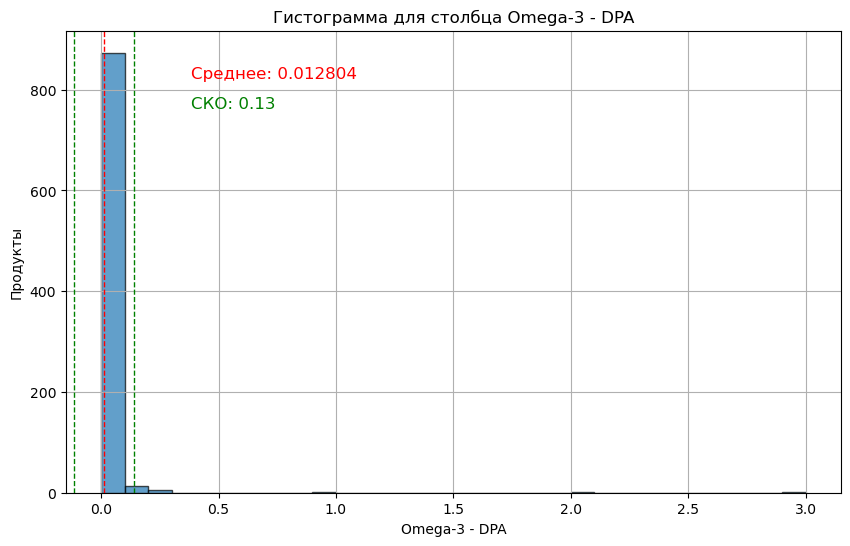

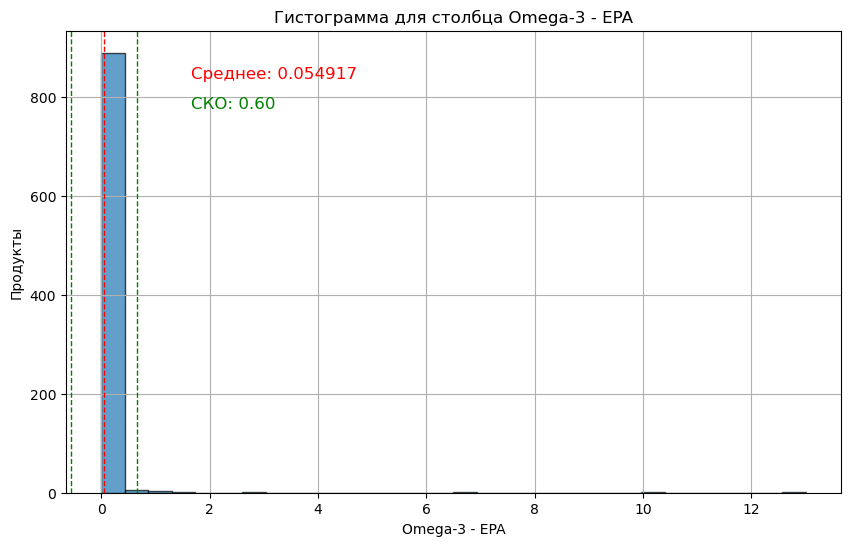

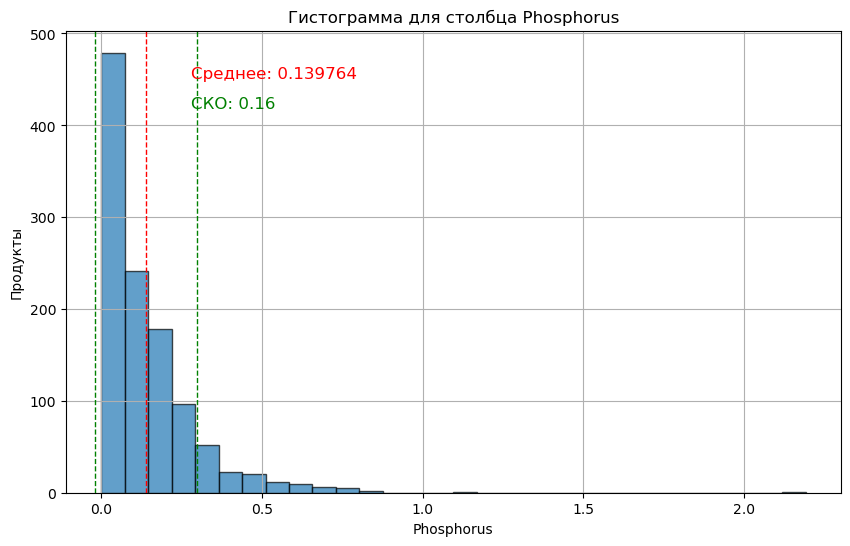

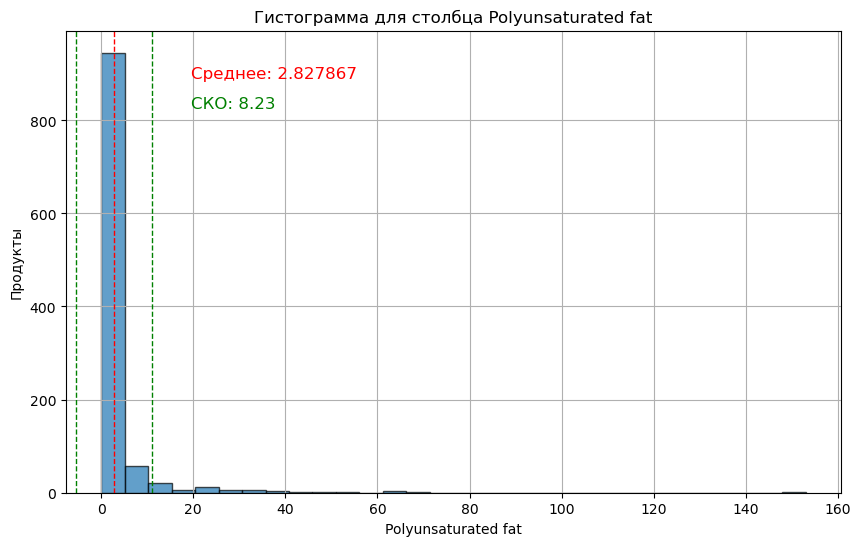

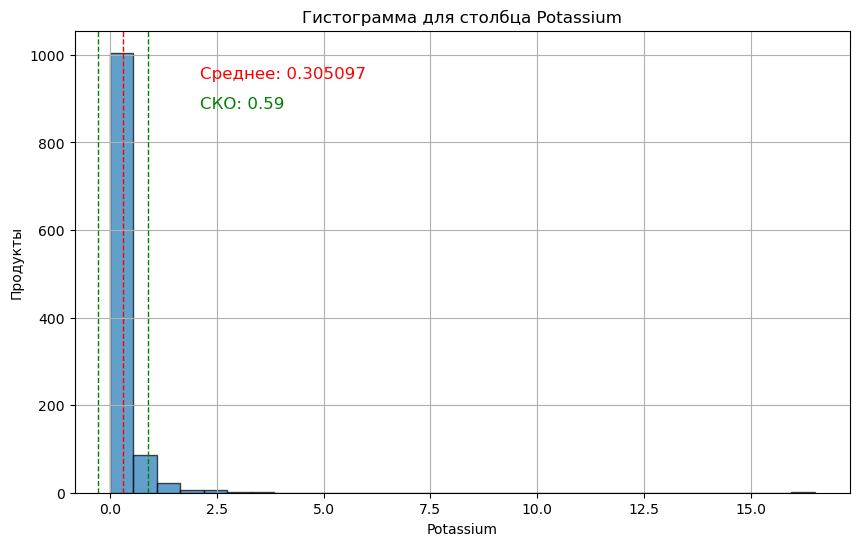

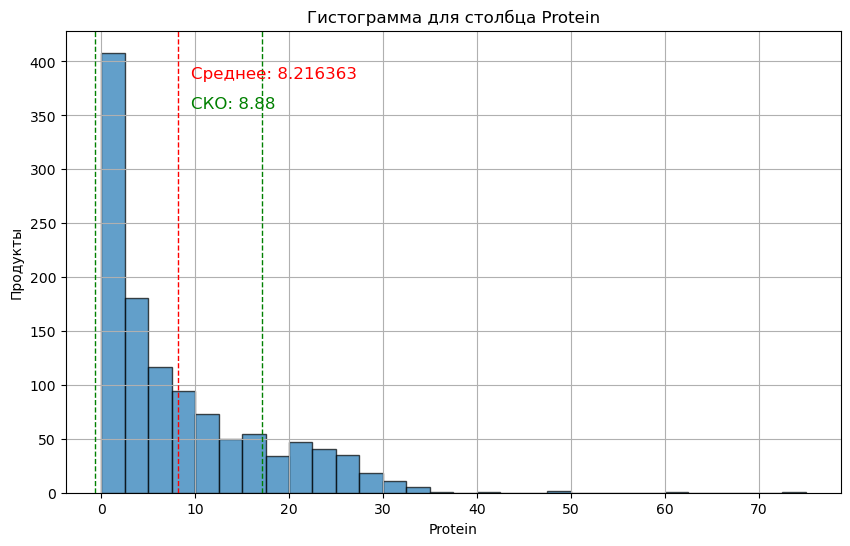

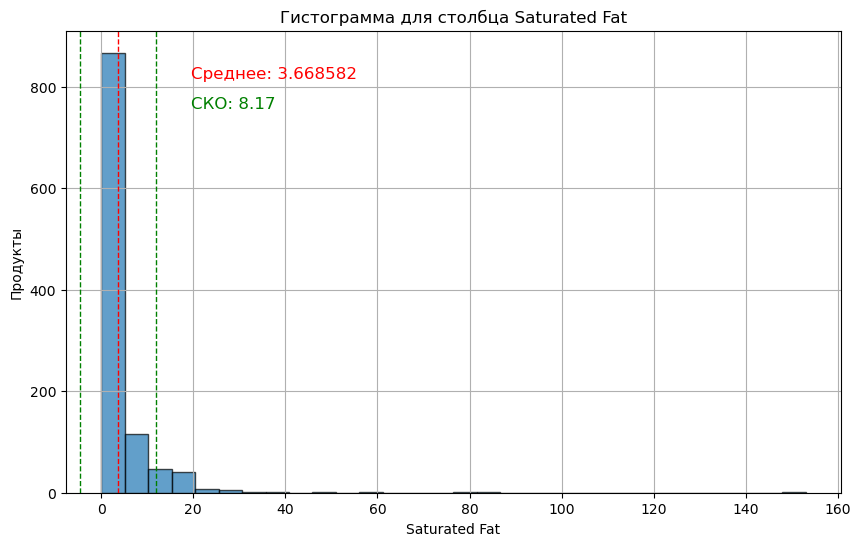

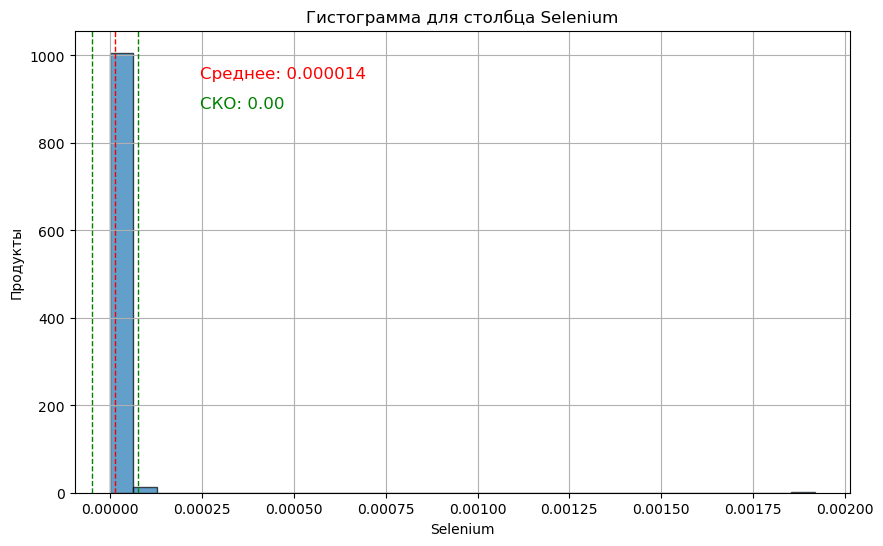

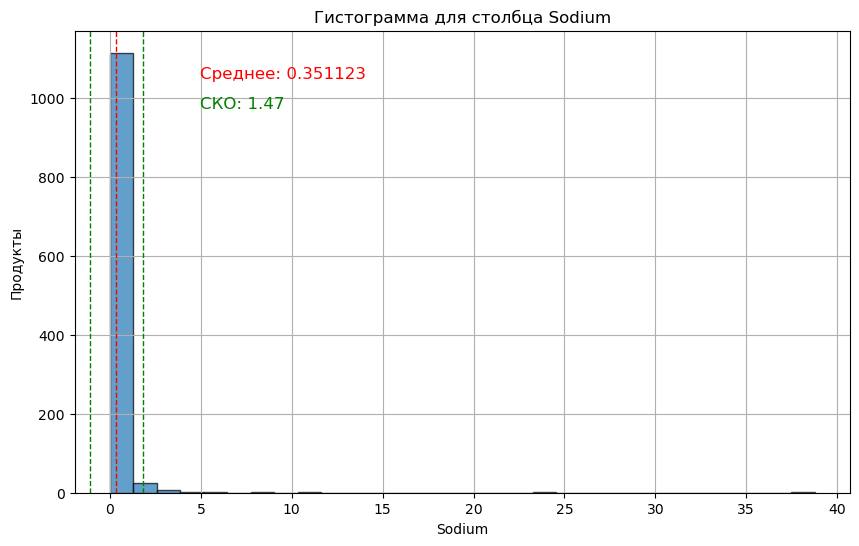

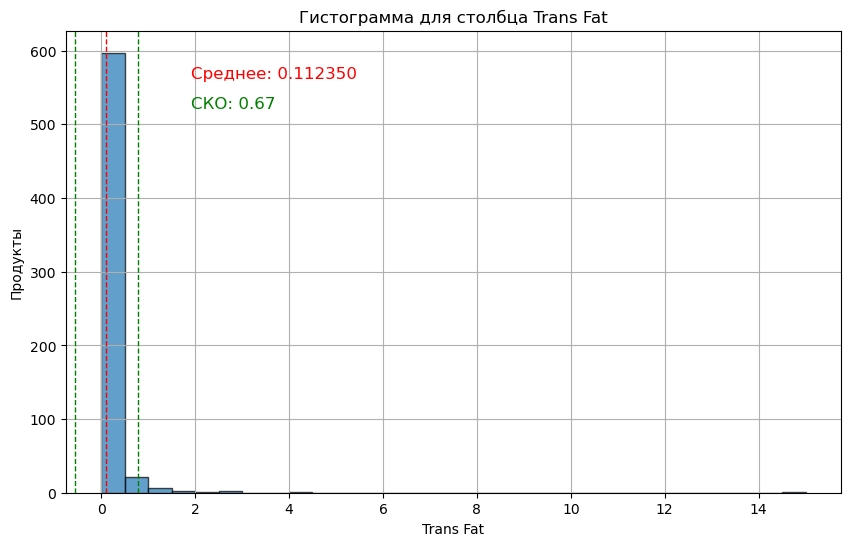

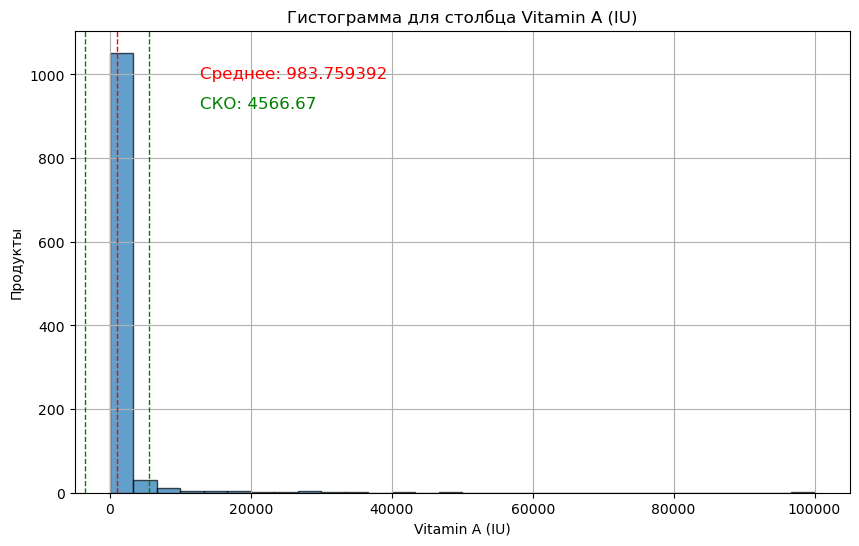

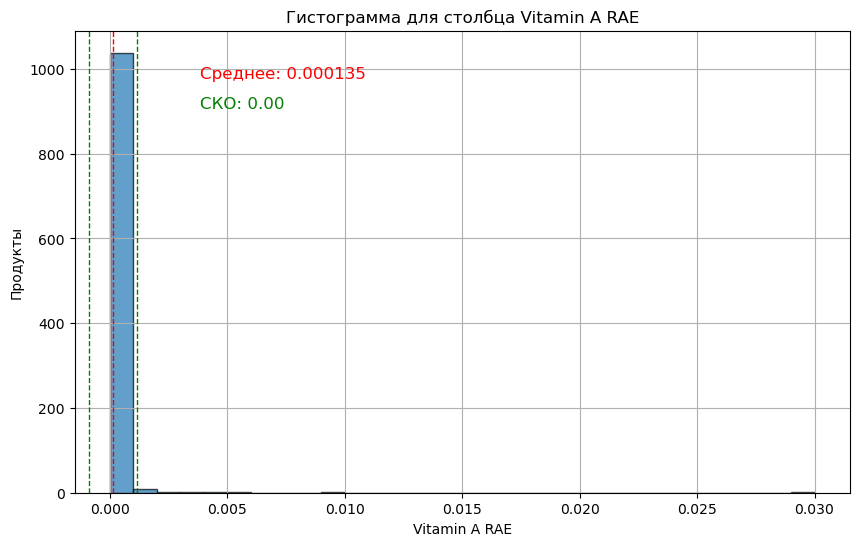

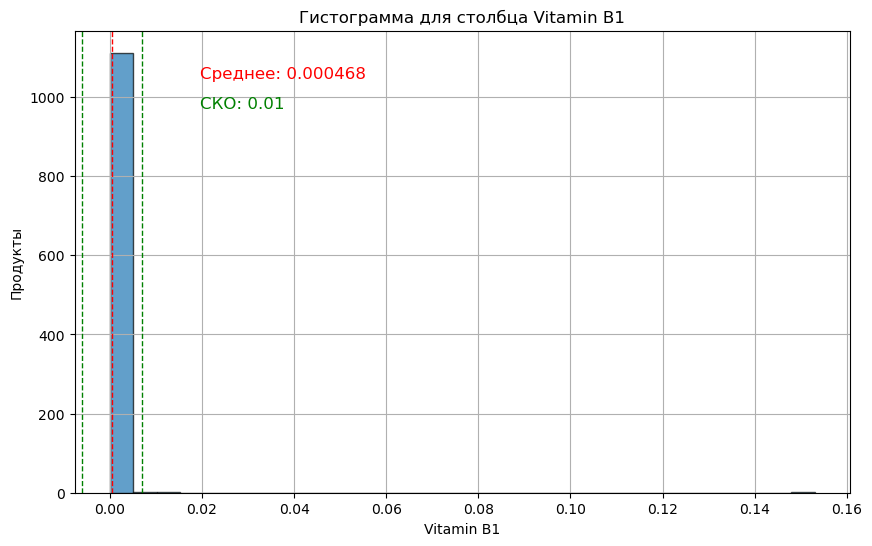

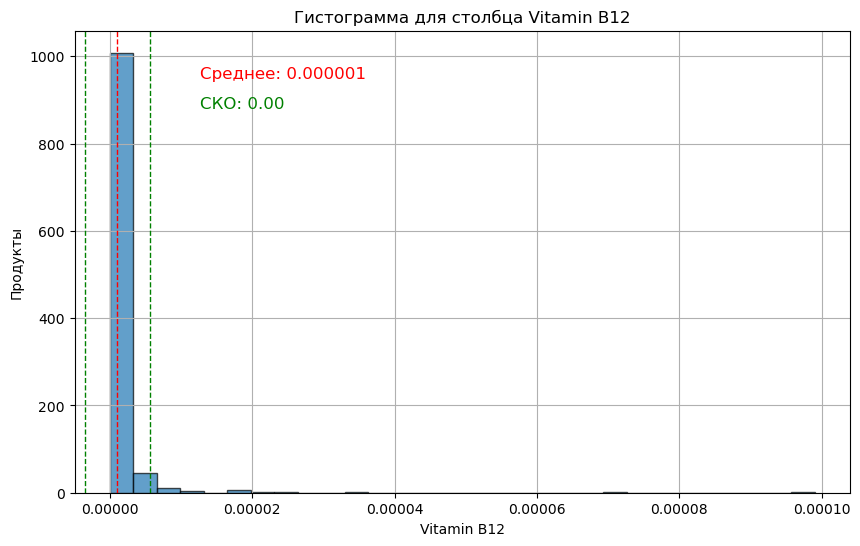

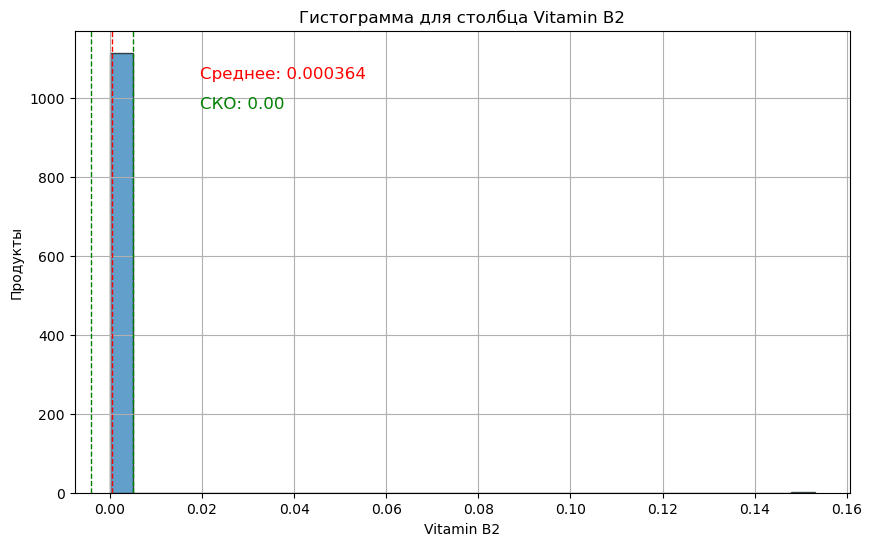

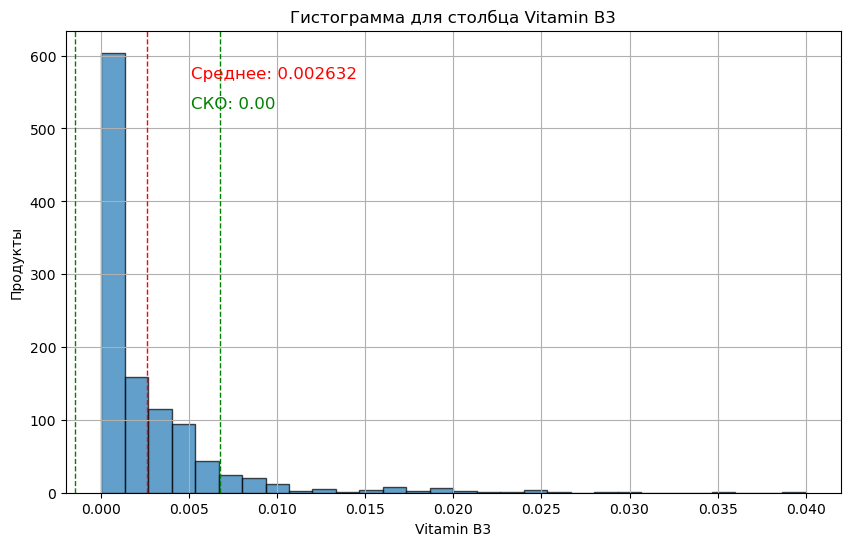

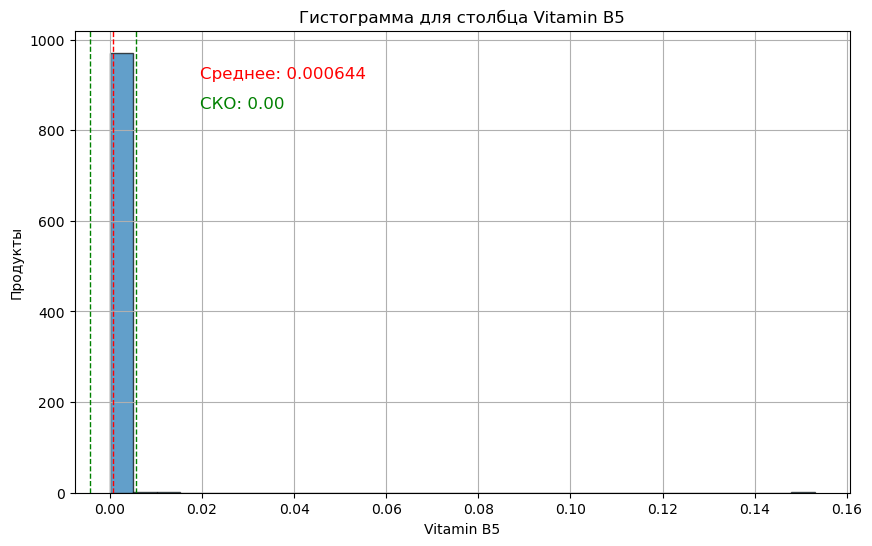

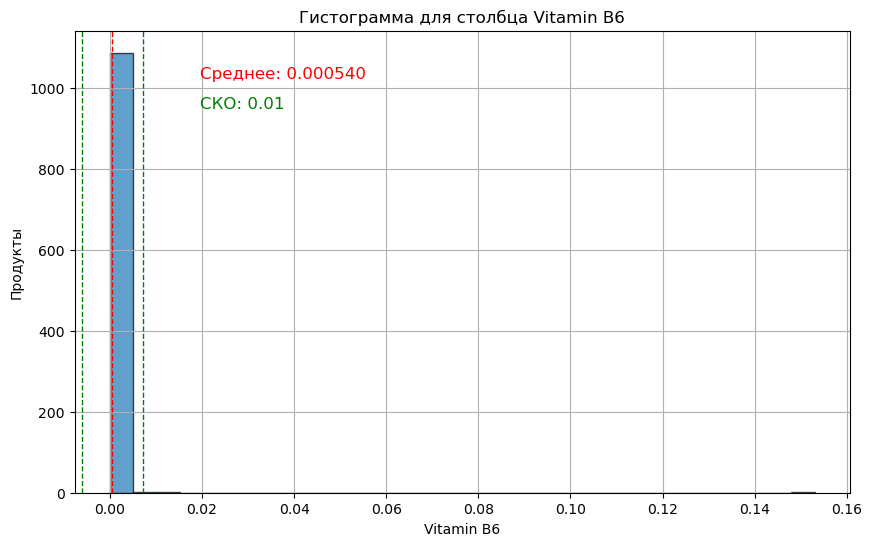

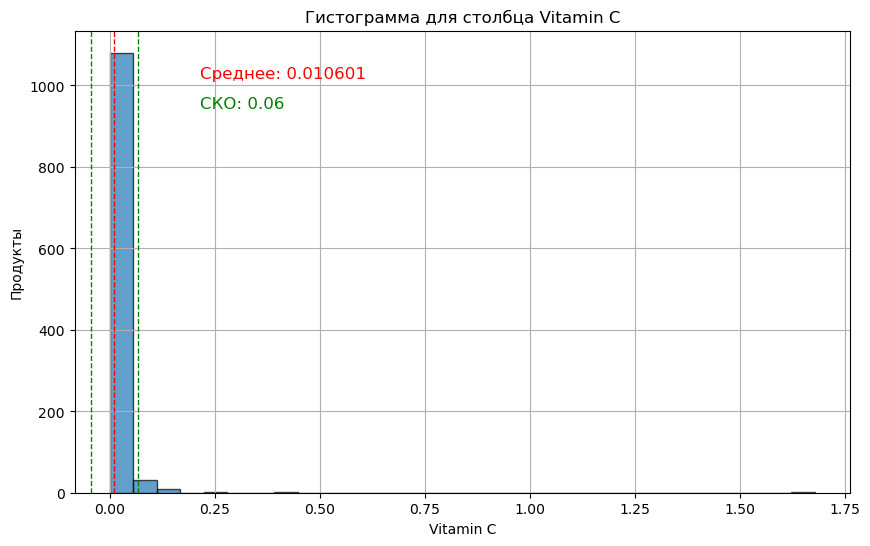

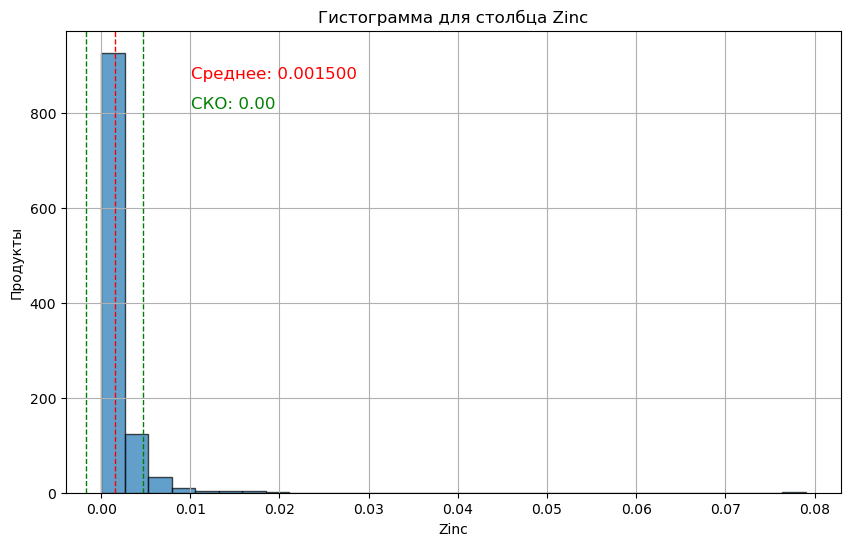

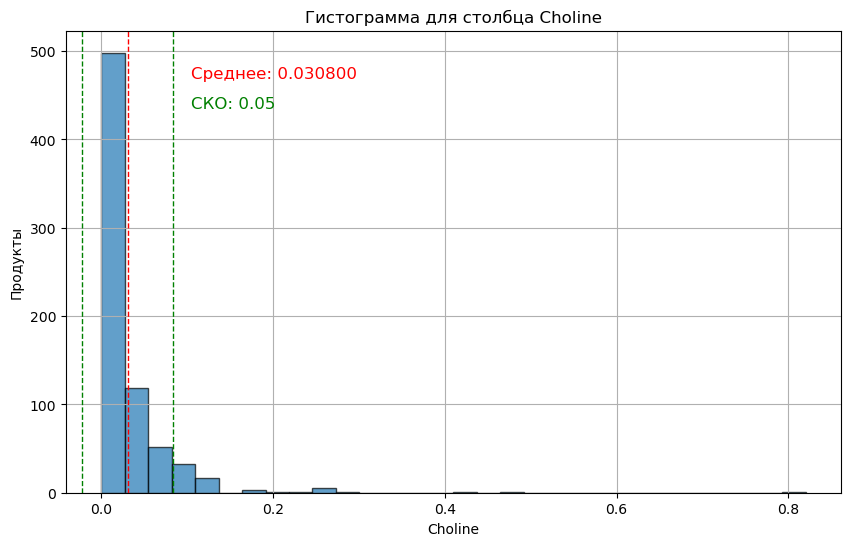

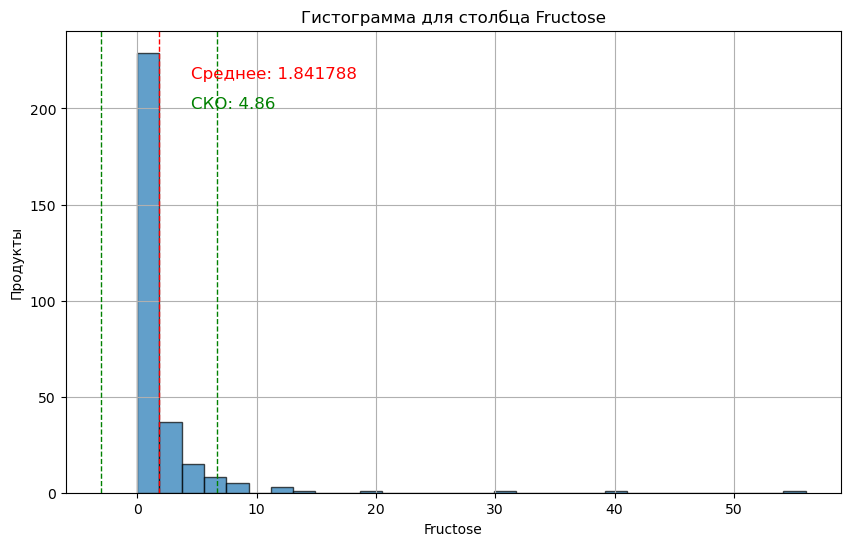

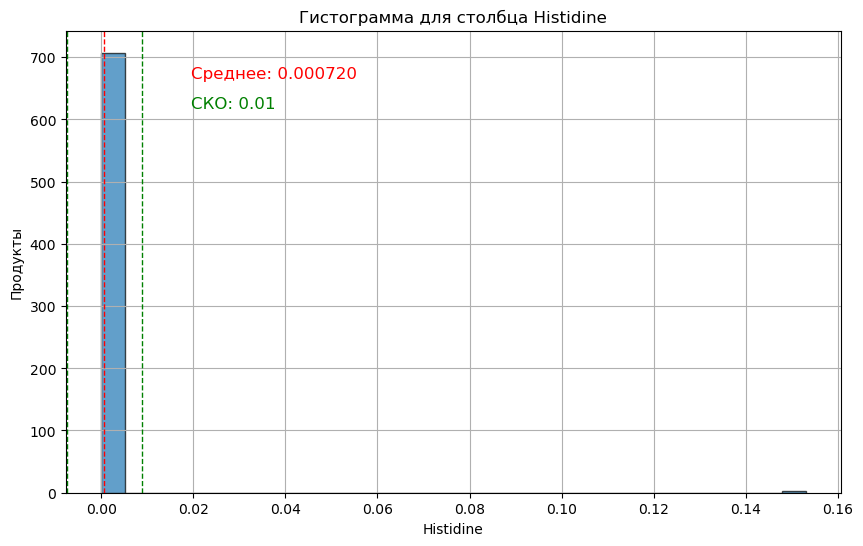

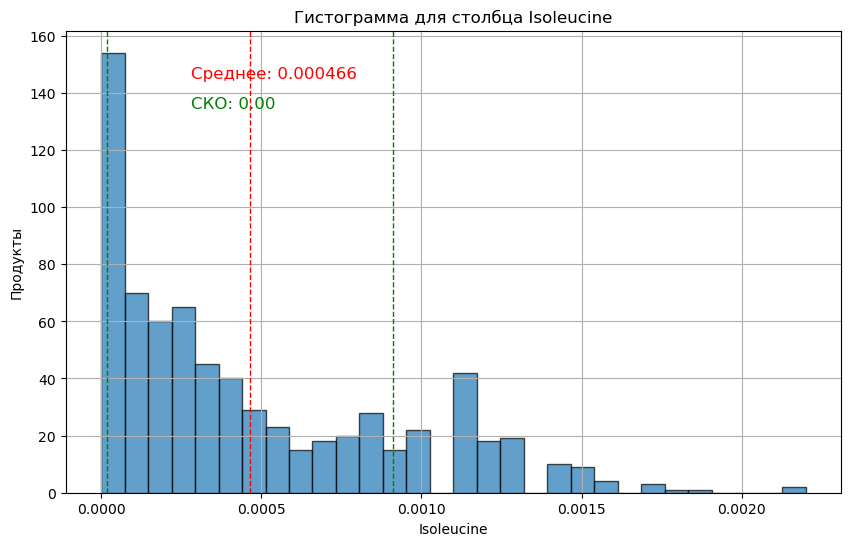

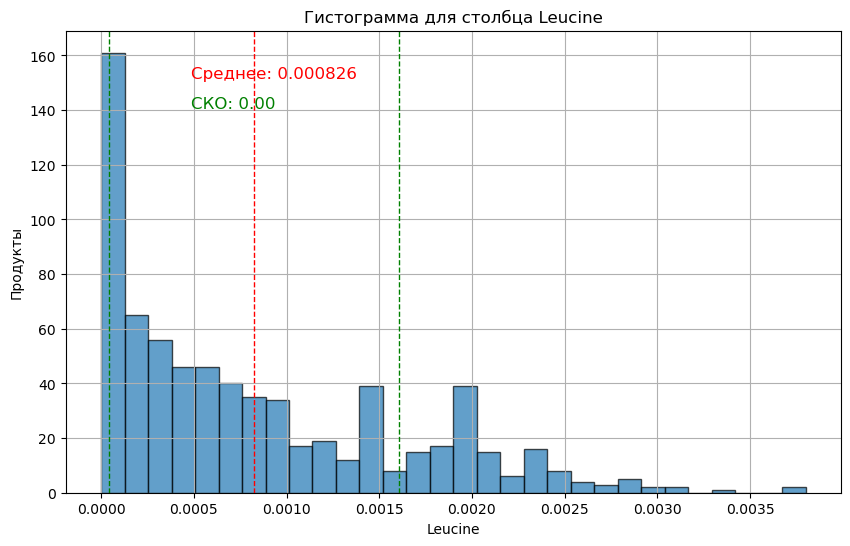

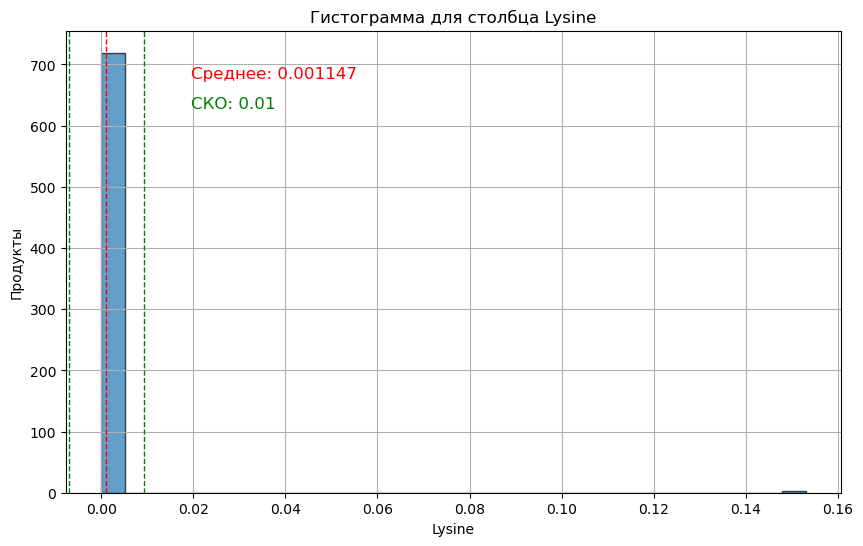

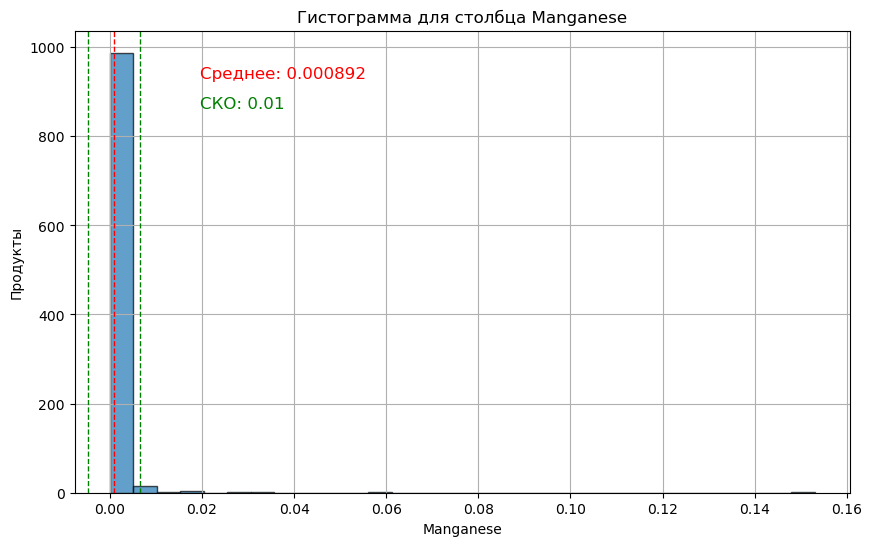

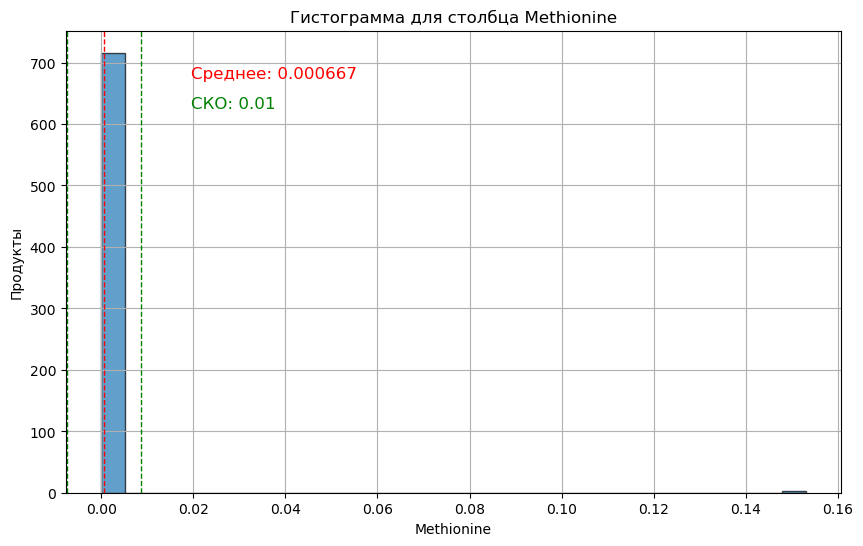

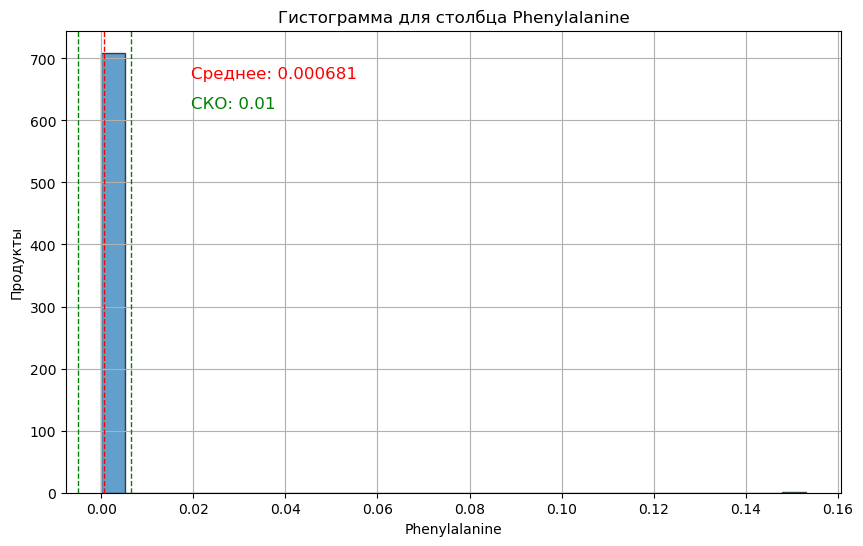

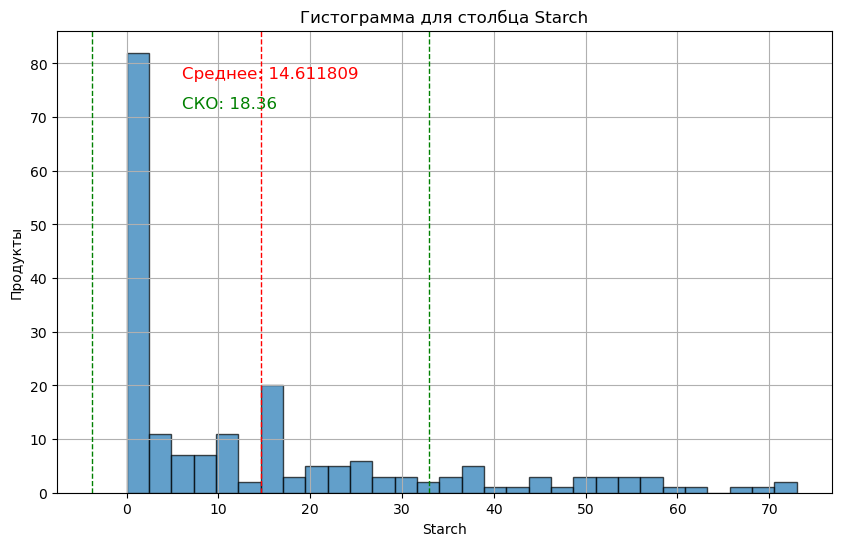

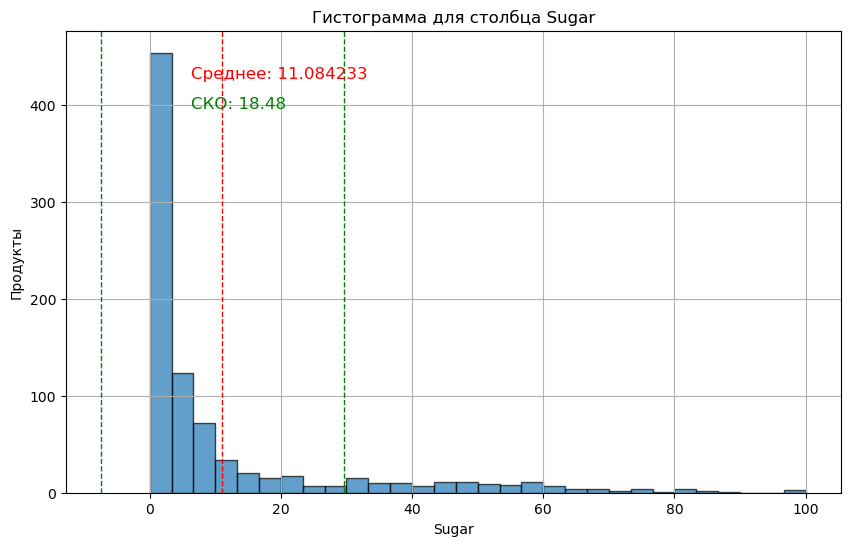

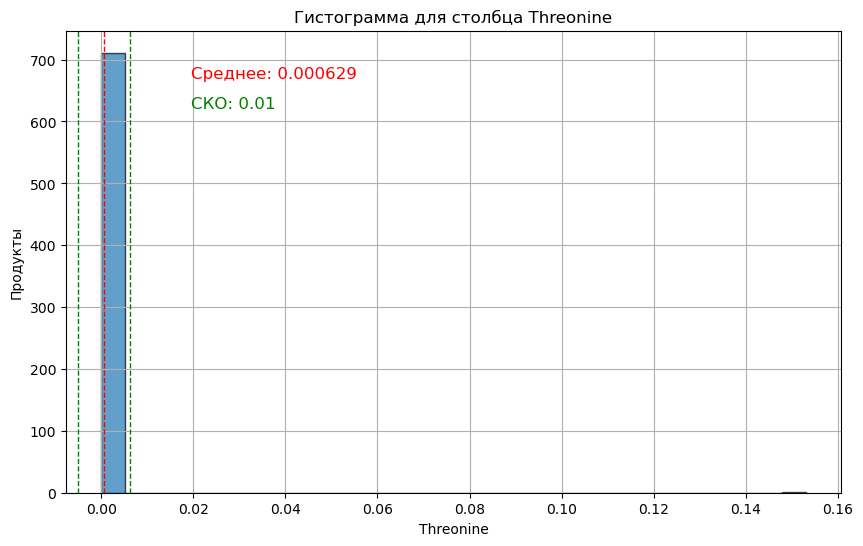

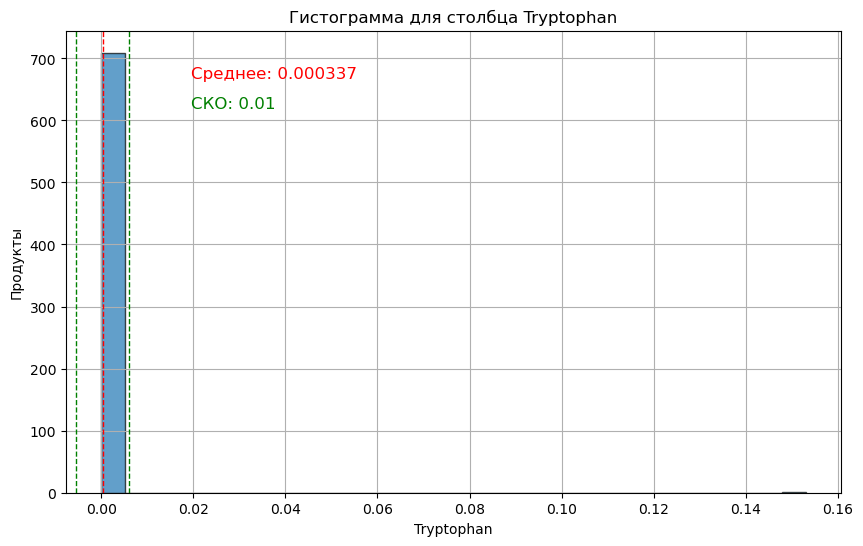

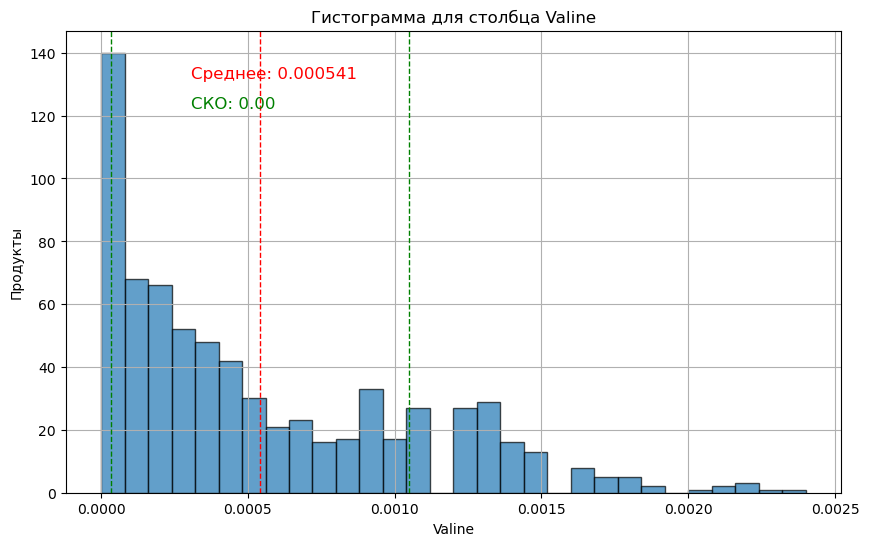

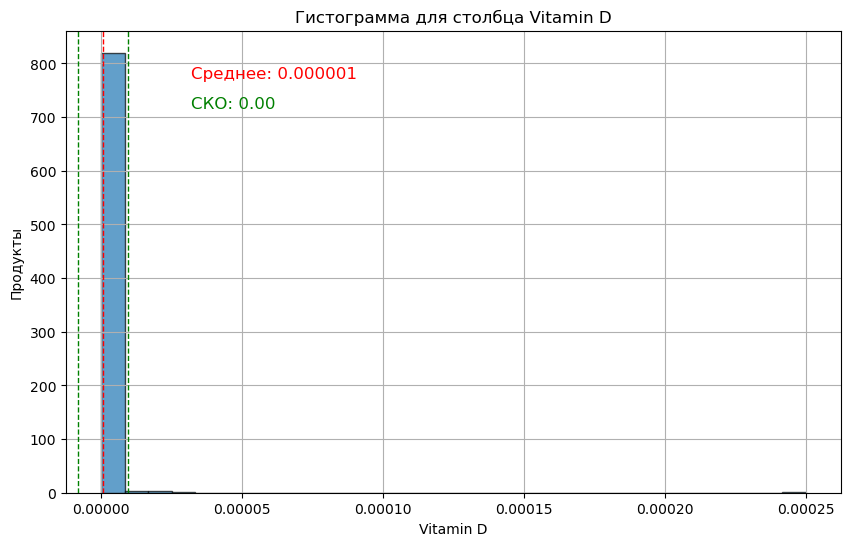

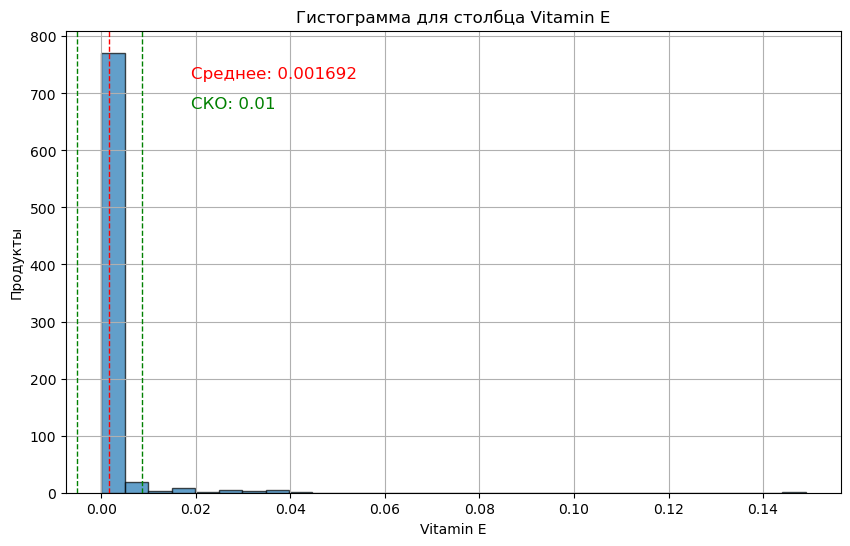

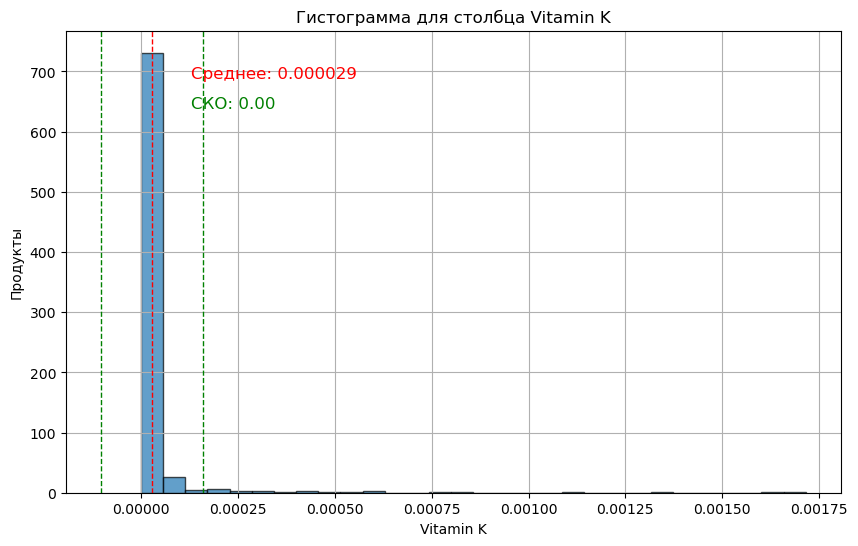

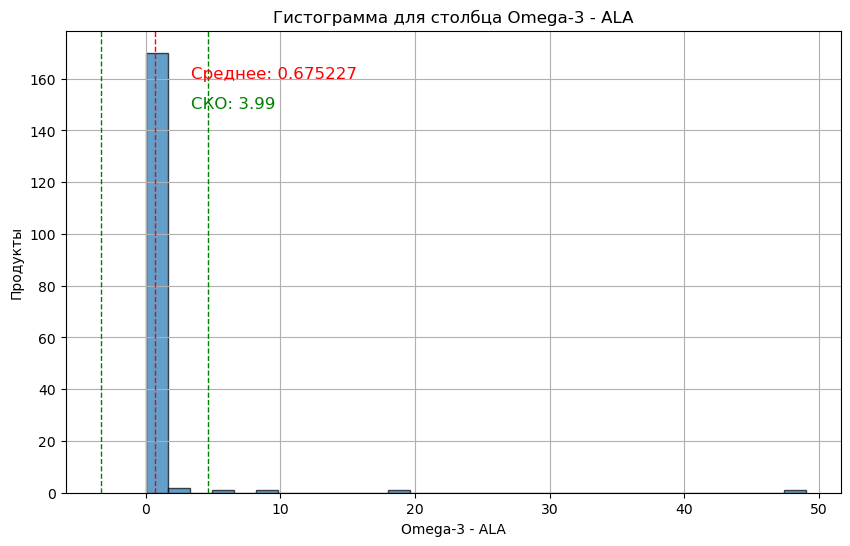

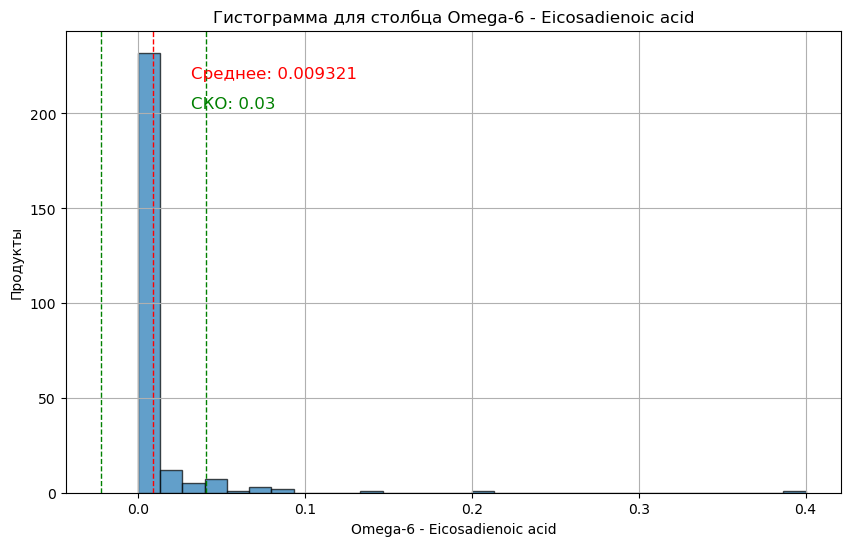

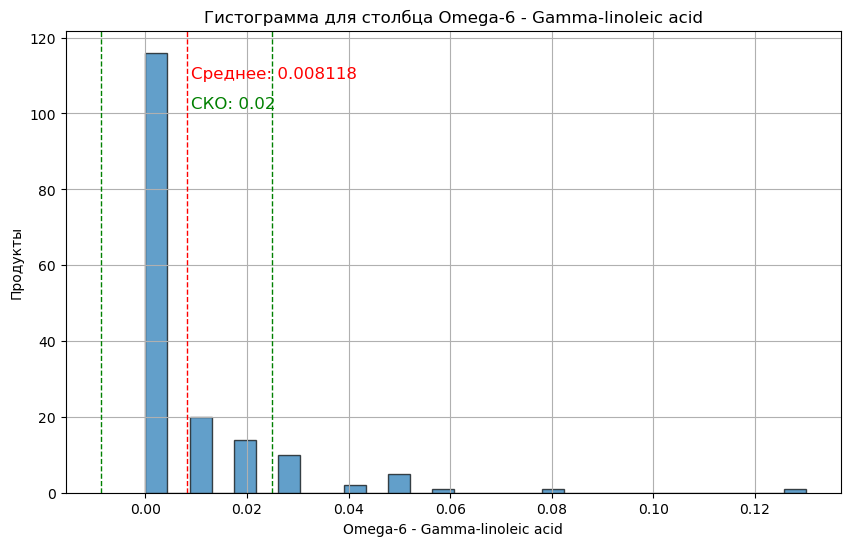

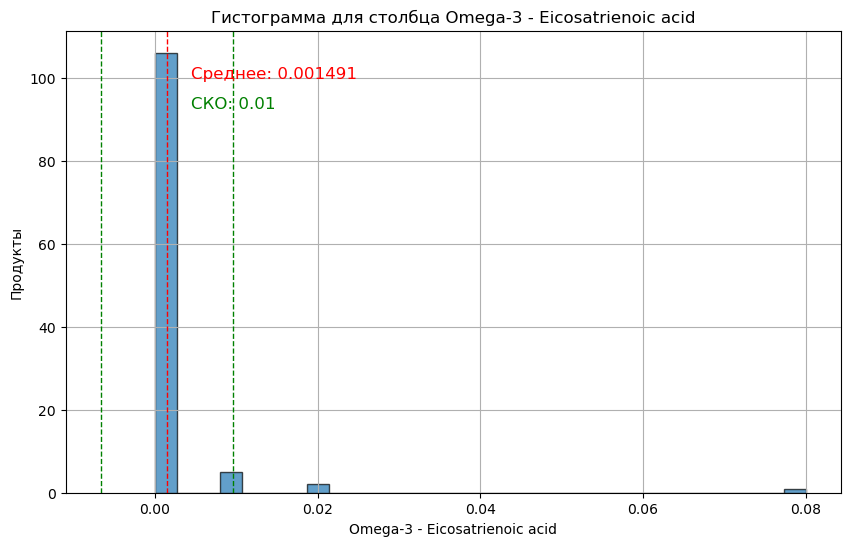

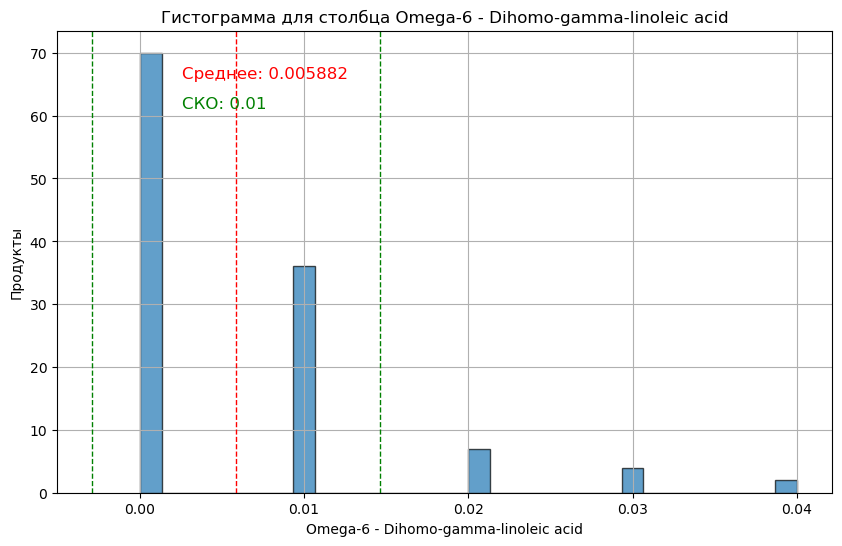

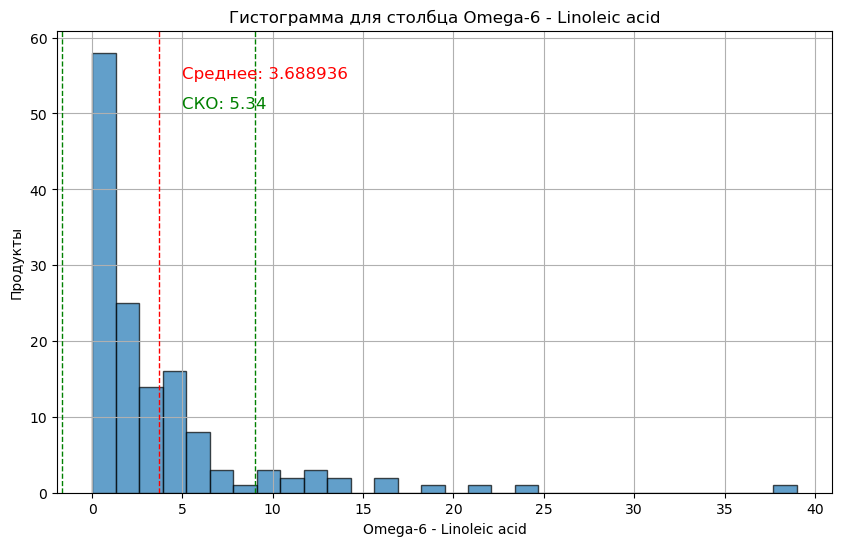

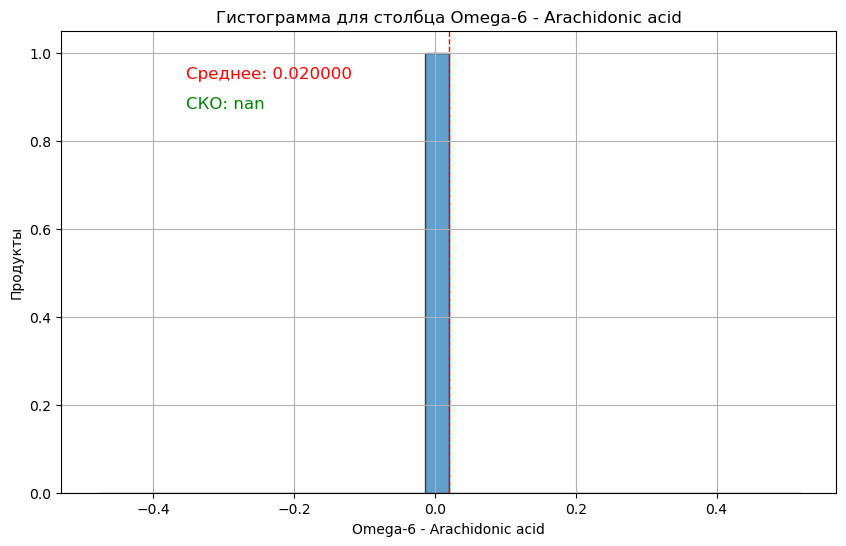

In [4]:
numeric_columns = data.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=30, edgecolor='k', alpha=0.7)

    mean_value = data[column].mean()
    std_dev = data[column].std()

    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value - std_dev, color='g', linestyle='dashed', linewidth=1)
    plt.axvline(mean_value + std_dev, color='g', linestyle='dashed', linewidth=1)

    plt.title(f'Гистограмма для столбца {column}')
    plt.xlabel(column)
    plt.ylabel('Продукты')
    plt.grid(True)

    plt.figtext(0.25, 0.8, f'Среднее: {mean_value:.6f}', fontsize=12, color='r')
    plt.figtext(0.25, 0.75, f'СКО: {std_dev:.2f}', fontsize=12, color='g')

    plt.show()

4. Корреляция между параметрами.

Высококореллированными являются такие атрибуты, как:
1) Калории и углеводы имеют высокую положительную корреляцию (0,43).
2) Калории и жиры имеют высокую положительную корреляцию (0,83).
3) Изолейцин и лейцин имеют высокую положительную корреляцию (0,98).

Остальные атрибуты можно считать низкокоррелированными или вовсе не коррелированными.

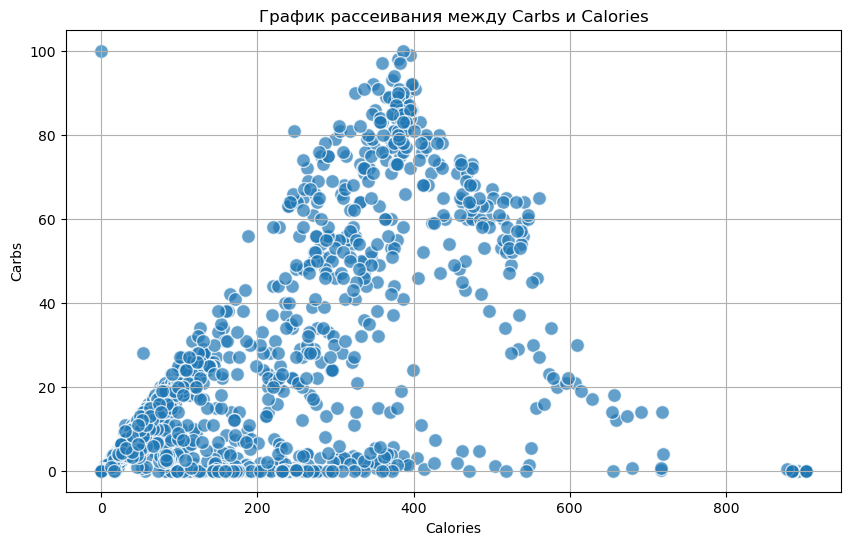

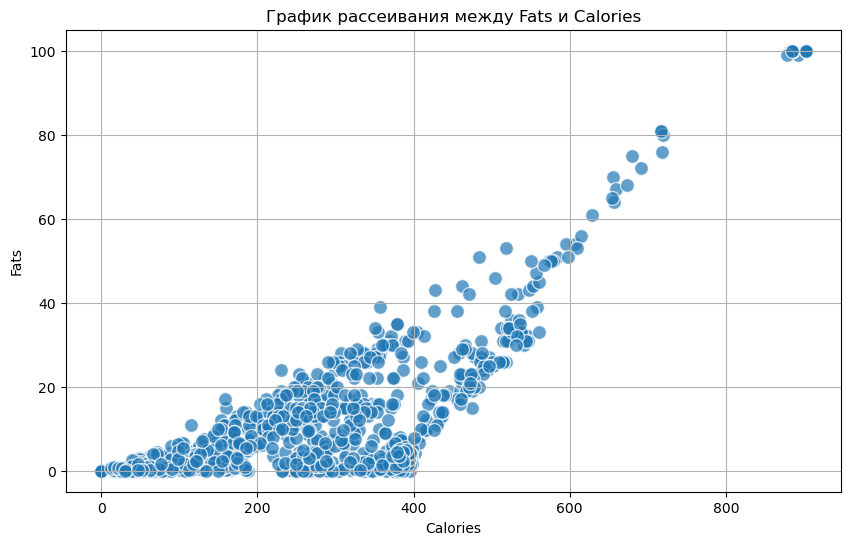

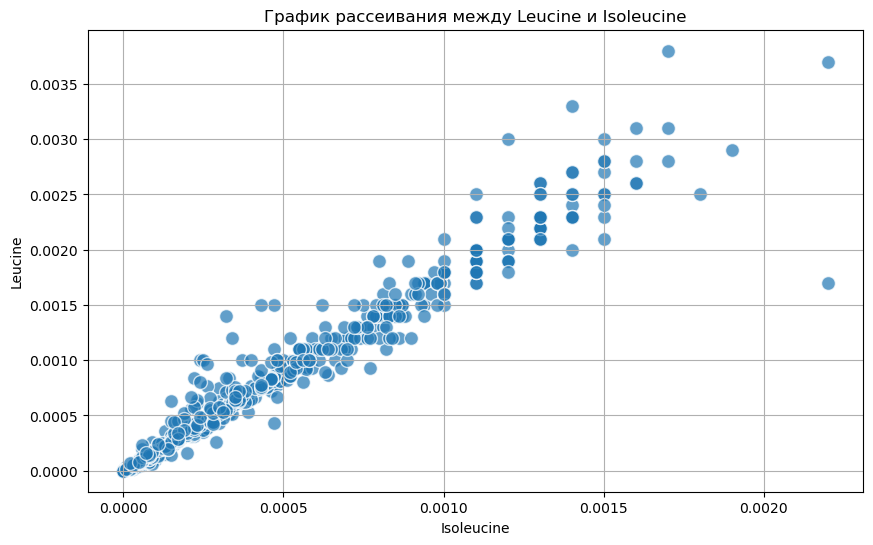

In [6]:
if 'Carbs' not in data.columns or 'Calories' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Carbs' и 'Calories'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Calories'], data['Carbs'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Carbs и Calories')
plt.xlabel('Calories')
plt.ylabel('Carbs')
plt.grid(True)
plt.show()

if 'Fats' not in data.columns or 'Calories' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Fats' и 'Calories'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Calories'], data['Fats'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Fats и Calories')
plt.xlabel('Calories')
plt.ylabel('Fats')
plt.grid(True)
plt.show()

if 'Leucine' not in data.columns or 'Isoleucine' not in data.columns:
    raise ValueError("В файле отсутствуют необходимые столбцы: 'Leucine' и 'Isoleucine'")
plt.figure(figsize=(10, 6))
plt.scatter(data['Isoleucine'], data['Leucine'], alpha=0.7, edgecolors='w', s=100)
plt.title('График рассеивания между Leucine и Isoleucine')
plt.xlabel('Isoleucine')
plt.ylabel('Leucine')
plt.grid(True)
plt.show()

Исходя из полученных графиков рассеивания, можно сделать следующие выводы:
* наиболее каллорийными микронутриентами в продуктах являются жиры и углеводы;
* лейцин и изолейцин содержится в примерно одинаковых количествах в каждом продукте.

Полученные гистограммы позволяют установить сколько микроэлементов приходится в среднем на все продукты.